In [9]:
import pandas as pd
import duckdb as db

def sql(query, database = "../data/df_clean.csv"):
    con = db.connect(database)
    res = con.execute(query).df()
    con.close()
    return res


In [21]:
df_full = sql(""" SELECT * from df_clean""")
df_full

,title,brand,price,rating,votes,sales_last_month,image_url,url,prime,category,rank,scraped_at
0,Garmin – Forerunner 55 - Montre GPS multi-acti...,Garmin,138.99,4.6,6532.0,1.0,https://m.media-amazon.com/images/I/61eTqEILa9...,https://www.amazon.fr/Garmin-Forerunner-multi-...,False,Objets connectés,1,2025-06-24 14:20:21.796320
1,Garmin Forerunner 255 - Montre GPS Multisports...,Garmin,203.99,4.5,1690.0,700.0,https://m.media-amazon.com/images/I/71tjy7Umf0...,https://www.amazon.fr/Garmin-GPS-Forerunner-25...,False,Objets connectés,2,2025-06-24 14:20:21.799403
2,"Garmin Forerunner 255, Music - Montre GPS Mult...",Garmin,244.00,4.5,616.0,700.0,https://m.media-amazon.com/images/I/51BxNNStky...,https://www.amazon.fr/Garmin-Forerunner-255-Mu...,False,Objets connectés,3,2025-06-24 14:20:21.802907
3,"Insta360 X5 - caméra d'action 360° 8K étanche,...",Insta360,589.99,4.5,559.0,300.0,https://m.media-amazon.com/images/I/71YjsbkkO9...,https://www.amazon.fr/Insta360-Invisible-rempl...,False,Objets connectés,4,2025-06-24 14:20:21.805683
4,Garmin Forerunner 255 – GPS-Laufuhr mit indivi...,Garmin,203.99,4.6,662.0,400.0,https://m.media-amazon.com/images/I/51oM3U58x2...,https://www.amazon.fr/Garmin-GPS-Forerunner-25...,False,Objets connectés,5,2025-06-24 14:20:21.808207
...,...,...,...,...,...,...,...,...,...,...,...,...
4906,Traqueur GPS pour enfants - Clés de chien cach...,Traqueur,30.99,1.0,1.0,NaN,https://m.media-amazon.com/images/I/71ll8TdY-4...,https://www.amazon.fr/Traqueur-GPS-pour-enfant...,True,Objets connectés,47941,2025-06-24 16:47:23.080776
4907,"Lot de 2 traqueurs GPS pour enfants, clés de c...",Lot,25.99,4.7,7.0,NaN,https://m.media-amazon.com/images/I/71Axw1YHuY...,https://www.amazon.fr/traqueurs-anti-retrait-f...,True,Objets connectés,47964,2025-06-24 16:47:27.311373
4908,Traqueur GPS pour enfants - Clés de chien cach...,Traqueur,30.99,1.0,1.0,NaN,https://m.media-amazon.com/images/I/71ll8TdY-4...,https://www.amazon.fr/Traqueur-GPS-pour-enfant...,True,Objets connectés,47965,2025-06-24 16:47:27.312839
4909,"Lot de 2 traqueurs GPS pour enfants, clés de c...",Lot,25.99,4.7,7.0,NaN,https://m.media-amazon.com/images/I/71Axw1YHuY...,https://www.amazon.fr/traqueurs-anti-retrait-f...,True,Objets connectés,47988,2025-06-24 16:47:31.542076


In [ ]:
#Top produits avec le label "Prime"

sql("""SELECT title, price, rating, votes from df_clean WHERE prime = 'True' ORDER BY votes DESC """)

,title,price,rating,votes
0,TOZO T10 Ecouteur Bluetooth sans Fil avec Blue...,31.34,4.1,302739.0
1,TOZO A1 Mini écouteurs sans Fil Bluetooth 5.3 ...,24.99,4.2,92712.0
2,iJoy Casque sans Fil Bluetooth sur L'oreille a...,26.99,4.3,86467.0
3,Xleader [Smart Touch] Enceinte sans Fil SoundA...,27.99,4.4,10470.0
4,Xleader [ Smart Touch] Enceinte Bluetooth Soun...,26.99,4.4,10470.0
...,...,...,...,...
787,Traqueur GPS pour enfants - Clés de chien cach...,30.99,1.0,1.0
788,Traqueur GPS pour enfants - Clés de chien cach...,30.99,1.0,1.0
789,Traqueur GPS pour enfants - Clés de chien cach...,30.99,1.0,1.0
790,Traqueur GPS pour enfants - Clés de chien cach...,30.99,1.0,1.0


In [35]:
sql("""SELECT AVG(rating) from df_clean WHERE prime = 'True'""")
#sql("""SELECT AVG(rating) from df_clean""")


,avg(rating)
0,3.065025


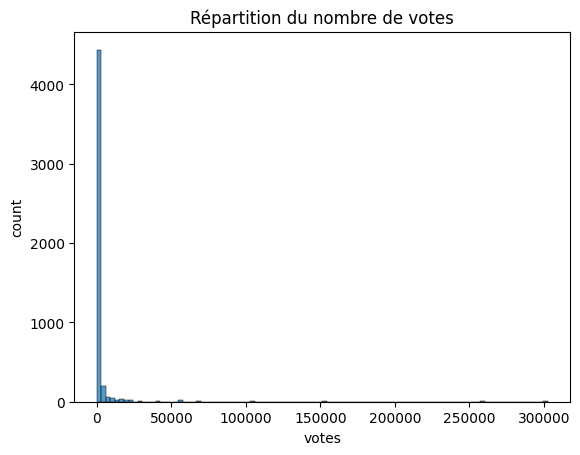

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.histplot(df_full['votes'], bins=100, kde=False)
plt.xlabel("votes")
plt.ylabel("count")
plt.title("Répartition du nombre de votes")
plt.show()

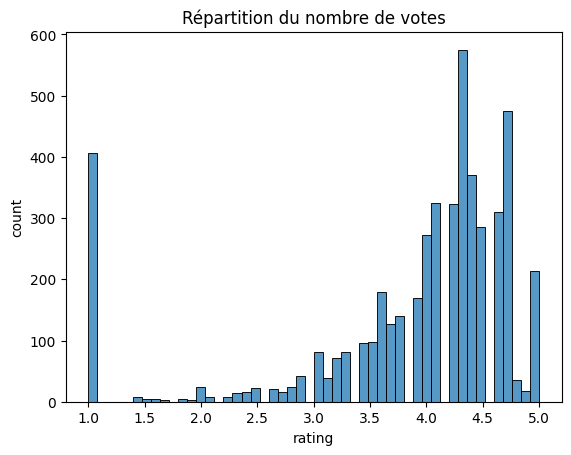

In [27]:
sns.histplot(df_full['rating'], bins=50, kde=False)
plt.xlabel("rating")
plt.ylabel("count")
plt.title("Répartition du nombre de votes")
plt.show()